# 分位点回帰

分位点$\tau$における条件付分位関数を

$$
Q_\tau(y_i | X_i) = F_y^{-1}(\tau | X_i)
$$

と表す。ここで$F_y^{-1}(\tau | X_i)$は$y$において$X_i$に条件づけられた$y_i$の分布関数である（$F_y^{-1}(\tau | X_i) = \inf \{ y: F_y(y|X_i) \geq \tau \}$）。

例えば$\tau = 0.1$のとき、$Q_\tau(y_i | X_i)$は$y_i$の下位10分位である。


標準的な回帰モデルは二乗誤差$(y_i - m(X_i))^2$の和や期待値を最小化するようにモデル$m(X_i)$を学習して条件付き期待値$E(y_i|X_i)$を予測する

$$
\newcommand{\argmin}{\mathop{\rm arg~min}\limits}
E(y_i|X_i) = \argmin_{m(X_i)}
E\big[ (y_i - m(X_i))^2 \big]
$$

**分位点回帰** （quantile regression）モデルはpinball loss$\rho_{\tau}(y_i - q(X_i))$の和や期待値を最小化するようにモデル$q(X_i)$を学習させ、条件付き分位関数$Q_{\tau}(y_i|X_i) = F^{-1}_y(\tau|X_i)$を予測する

$$
Q_{\tau}(y_i|X_i) = \argmin_{q(X_i)} 
E\big[ \rho_{\tau}(y_i - q(X_i)) \big]
$$



pinball lossは $\tau$-tiled absolute value function や 検定関数（check function）とも呼ばれる（グラフを描くとチェックマークに似てるため）

$$
\rho_{\tau} (x) = \big(\tau - \mathbb{1}(x \leq 0) \big) x
$$

あるいは

$$
\rho_{\tau} (x) =
\begin{cases}
(\tau - 1) x & \text{ if } x \leq 0\\
\tau x & \text{ if } x > 0\\
\end{cases}
$$

と書かれる

:::{margin}

$$
\rho_{\tau} (x) = \big(\tau - \mathbb{1}(x \leq 0) \big) x
$$

は

$x \leq 0$のときは

$$
\big(\tau - \mathbb{1}(x \leq 0) \big) x
= (\tau - 1) x
$$

となり、

$x > 0$のときは

$$
\big(\tau - \mathbb{1}(x \leq 0) \big) x
= (\tau - 0) x = \tau x
$$

となるので、

$$
\rho_{\tau} (x) =
\begin{cases}
(\tau - 1) x & \text{ if } x \leq 0\\
\tau x & \text{ if } x > 0\\
\end{cases}
\\
= \big(\tau - \mathbb{1}(x \leq 0) \big) x
$$

:::

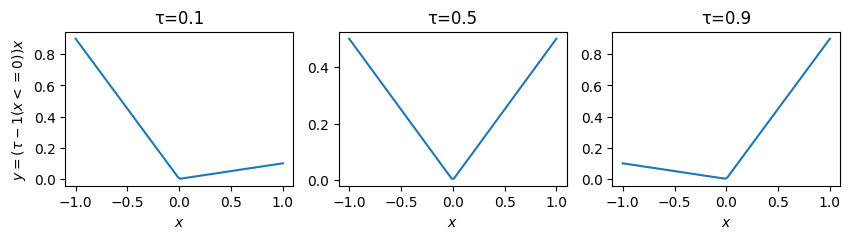

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def pinball_loss(x, tau):
    return (tau - 1 * (x <= 0)) * x

x = np.linspace(-1, 1, 100)
fig, axes = plt.subplots(figsize=[10, 2], ncols=3)
for i, tau in enumerate([0.1, 0.5, 0.9]):
    y = pinball_loss(x, tau=tau)
    axes[i].plot(x, y)
    if i == 0:
        axes[i].set(title=f"τ={tau}", xlabel=r"$x$", ylabel=r"$y = (\tau - 1(x <= 0)) x$")
    else:
        axes[i].set(title=f"τ={tau}", xlabel=r"$x$")
fig.show()

なお、pinball lossは$\tau=0.5$のとき

$$
\begin{align}
\rho_{0.5} (x) 
&=
\begin{cases}
-0.5 x & \text{ if } x \leq 0\\
0.5 x & \text{ if } x > 0\\
\end{cases}
\\
&= \frac{1}{2} |x|
\end{align}
$$

と、絶対誤差と比例する形になる。

絶対誤差の和を目的関数にとった線形モデルは統計学においてleast absolute deviations (LAD) と呼ばれ、その解は条件付き中央値になる

$$
\text{median}(y_i|X_i) = Q_{0.5}(y_i|X_i) = \argmin_{q(X_i)} E\big[ \rho_{0.5}(y_i - q(X_i)) \big]
$$


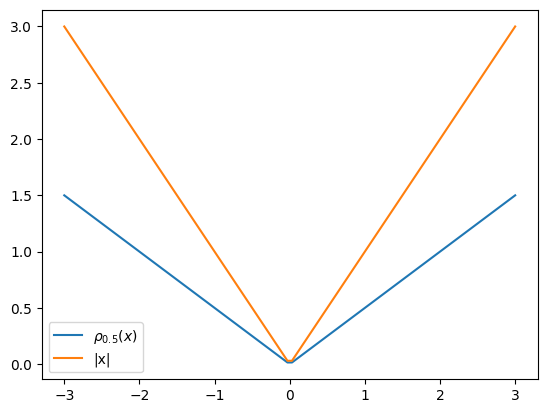

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def pinball_loss(x, tau):
    return (tau - 1 * (x <= 0)) * x

x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots()
ax.plot(x, pinball_loss(x, tau=0.5), label=r"$\rho_{0.5}(x)$")
ax.plot(x, abs(x), label="|x|")
ax.legend()
fig.show()

## モデルの評価

### D2 pinball score

$D^2$は$R^2$の一般化

$$
D^2(y, \hat{y}) = 1 - \frac{\text{dev}(y, \hat{y})}{\text{dev}(y, y_{\text{null}})}
$$

ここで$y_{\text{null}}$は切片のみのモデルの最適解（例：二乗誤差なら$y$の平均値、絶対誤差なら$y$の中央値、pinball lossなら$y$の指定されたquantile）

この$D^2$に

$$
\text{dev}(y, \hat{y}) = \text{pinball}(y, \hat{y})
$$

を代入したものが$D^2$ pinball score


### interval score

- [[2011.09588] Beyond Pinball Loss: Quantile Methods for Calibrated Uncertainty Quantification](https://arxiv.org/abs/2011.09588)

## 分位点回帰モデルの実践

statsmodelsでは `quantreg()` で実行できる

[Quantile regression - statsmodels 0.15.0 (+213)](https://www.statsmodels.org/devel/examples/notebooks/generated/quantile_regression.html)

/tmp/ipykernel_1497/2518785238.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


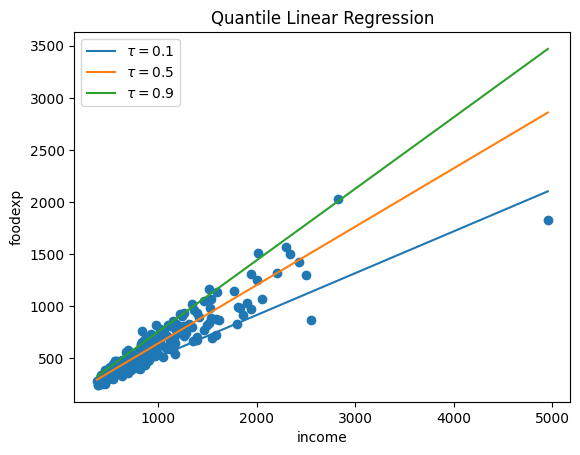

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = sm.datasets.engel.load_pandas().data

fig, ax = plt.subplots()
ax.scatter(data["income"], data["foodexp"])
ax.set(xlabel="income", ylabel="foodexp", title="Quantile Linear Regression")

x = np.linspace(data["income"].min(), data["income"].max(), 10)
model = smf.quantreg("foodexp ~ income", data)
for q in [0.1, 0.5, 0.9]:
    res = model.fit(q=q)
    y_hat = res.predict(pd.DataFrame({"income": x}))
    ax.plot(x, y_hat, label=fr"$\tau = {q}$")
ax.legend()
fig.show()